Exploratory Data Analysis (EDA) Dataset Churn, Nunu, Dlo, Dana

Dalam analisis churn, data yang biasanya dianggap relevan mencakup:


Data Perilaku Pelanggan: Data tentang bagaimana pelanggan berinteraksi dengan bisnis Anda, seperti frekuensi pembelian, jenis produk atau layanan yang mereka beli, dan kapan terakhir kali mereka bertransaksi.

Data Demografis: Informasi tentang demografi pelanggan, seperti usia, jenis kelamin, pendapatan, lokasi geografis, dan lain-lain, yang dapat membantu dalam pemahaman lebih dalam tentang segmen pelanggan.

Data Retensi: Informasi tentang upaya yang telah dilakukan untuk mempertahankan pelanggan, seperti program loyalitas, promosi, atau diskon yang ditawarkan kepada pelanggan.



In [1]:
import pandas as pd

In [2]:
df_churn = pd.read_csv("data.csv")

In [3]:
df_churn.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.81667,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.81667,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.81667,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.81667,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.81667,-6.2,6942.0


In [4]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer ID                   7043 non-null   int64  
 1   Tenure Months                 7043 non-null   int64  
 2   Location                      7043 non-null   object 
 3   Device Class                  7043 non-null   object 
 4   Games Product                 7043 non-null   object 
 5   Music Product                 7043 non-null   object 
 6   Education Product             7043 non-null   object 
 7   Call Center                   7043 non-null   object 
 8   Video Product                 7043 non-null   object 
 9   Use MyApp                     7043 non-null   object 
 10  Payment Method                7043 non-null   object 
 11  Monthly Purchase (Thou. IDR)  7043 non-null   float64
 12  Churn Label                   7043 non-null   object 
 13  Lon

In [5]:
df_churn.describe()

,Customer ID,Tenure Months,Monthly Purchase (Thou. IDR),Longitude,Latitude,CLTV (Predicted Thou. IDR)
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,32.371149,84.190200,107.043249,-6.404182,5720.384481
std,2033.283305,24.559481,39.117061,0.358314,0.322896,1537.974298
min,0.000000,0.000000,23.725000,106.816670,-6.914740,2603.900000
25%,1760.500000,9.000000,46.150000,106.816670,-6.914740,4509.700000
50%,3521.000000,29.000000,91.455000,106.816670,-6.200000,5885.100000
75%,5281.500000,55.000000,116.805000,107.609810,-6.200000,6994.650000
max,7042.000000,72.000000,154.375000,107.609810,-6.200000,8450.000000


In [6]:
def report(df):
    col = []
    d_type = []
    uniques = []
    n_uniques = []
    
    for i in df.columns:
        col.append(i)
        d_type.append(df[i].dtypes)
        uniques.append(df[i].unique()[:5])
        n_uniques.append(df[i].nunique())
    
    return pd.DataFrame({'Column': col, 'd_type': d_type, 'unique_sample': uniques, 'n_uniques': n_uniques})

In [7]:
report(df_churn)

,Column,d_type,unique_sample,n_uniques
0,Customer ID,int64,"[0, 1, 2, 3, 4]",7043
1,Tenure Months,int64,"[2, 8, 28, 49, 10]",73
2,Location,object,"[Jakarta, Bandung]",2
3,Device Class,object,"[Mid End, High End, Low End]",3
4,Games Product,object,"[Yes, No, No internet service]",3
5,Music Product,object,"[Yes, No, No internet service]",3
6,Education Product,object,"[No, Yes, No internet service]",3
7,Call Center,object,"[No, Yes]",2
8,Video Product,object,"[No, Yes, No internet service]",3
9,Use MyApp,object,"[No, Yes, No internet service]",3


In [8]:
# one time run
new_col = df_churn.columns.str.replace(' ', '_')
df_churn.columns = new_col

In [9]:
missing_values = df_churn.isnull().sum()
print(missing_values)


Customer_ID                     0
Tenure_Months                   0
Location                        0
Device_Class                    0
Games_Product                   0
Music_Product                   0
Education_Product               0
Call_Center                     0
Video_Product                   0
Use_MyApp                       0
Payment_Method                  0
Monthly_Purchase_(Thou._IDR)    0
Churn_Label                     0
Longitude                       0
Latitude                        0
CLTV_(Predicted_Thou._IDR)      0
dtype: int64


In [10]:
df_churn.columns

Index(['Customer_ID', 'Tenure_Months', 'Location', 'Device_Class',
       'Games_Product', 'Music_Product', 'Education_Product', 'Call_Center',
       'Video_Product', 'Use_MyApp', 'Payment_Method',
       'Monthly_Purchase_(Thou._IDR)', 'Churn_Label', 'Longitude', 'Latitude',
       'CLTV_(Predicted_Thou._IDR)'],
      dtype='object')

In [11]:
columns_to_drop = ['Customer_ID', 'Longitude', 'Latitude', 'CLTV_(Predicted_Thou._IDR)']
df_churn.drop(columns=columns_to_drop, inplace=True)


In [12]:
df_churn.columns

Index(['Tenure_Months', 'Location', 'Device_Class', 'Games_Product',
       'Music_Product', 'Education_Product', 'Call_Center', 'Video_Product',
       'Use_MyApp', 'Payment_Method', 'Monthly_Purchase_(Thou._IDR)',
       'Churn_Label'],
      dtype='object')

In [13]:
df_churn.head()

,Tenure_Months,Location,Device_Class,Games_Product,Music_Product,Education_Product,Call_Center,Video_Product,Use_MyApp,Payment_Method,Monthly_Purchase_(Thou._IDR),Churn_Label
0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes
1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes
2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes
3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes
4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes


EDA

In [14]:
import matplotlib.pyplot as plt

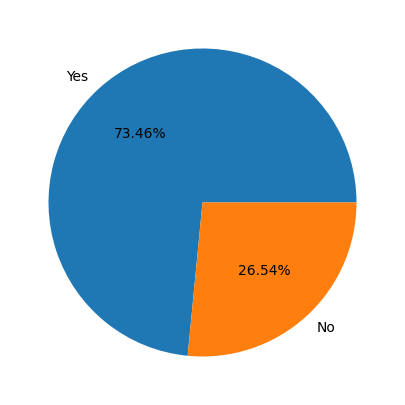

In [15]:
plt.figure(figsize=(10,5))
plt.pie(df_churn['Churn_Label'].value_counts(), labels=df_churn['Churn_Label'].unique(), autopct='%.2f%%')
plt.show()

Di sini bisa kita liat, 73.46% pelanggan churn, dan 26.54% tidak churn

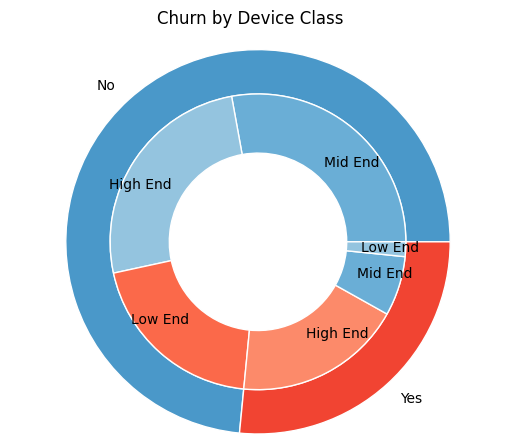

In [16]:
by_device = df_churn.groupby('Churn_Label')['Device_Class'].value_counts().to_frame().rename(columns={'Device_Class': 'Freq'}).reset_index().sort_values('Churn_Label')

# Make data: I have 3 groups and 7 subgroups
group_names = df_churn['Churn_Label'].value_counts().index
group_size = df_churn['Churn_Label'].value_counts()
subgroup_names = by_device['Device_Class']
subgroup_size = by_device['Freq']

# Create colors
a, b = [plt.cm.Blues, plt.cm.Reds]

# First Ring (outside)
fig, ax = plt.subplots()
fig.suptitle('Churn by Device Class')
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6)])
plt.setp(mypie, width=0.3, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), b(0.5), b(0.4)])
plt.setp(mypie2, width=0.4, edgecolor='white')
plt.margins(0, 0)

# Show the plot
plt.show()


In [17]:
df_churn.groupby('Churn_Label')['Device_Class'].value_counts(normalize=True).to_frame().rename(columns={'Device_Class': 'Ratio'}).reset_index().sort_values('Churn_Label')

,Churn_Label,Device_Class,Ratio
0,No,Mid End,0.379204
1,No,High End,0.347700
2,No,Low End,0.273096
3,Yes,High End,0.693954
4,Yes,Mid End,0.245586
5,Yes,Low End,0.060460


Rasio Churn Berdasarkan Device

-Rasio Churn pada kelas "High End" lebih tinggi daripada kelas "Mid End" dan "Low End" untuk pelanggan yang beralih (Yes Churn_Label). Ini mungkin menunjukkan bahwa pelanggan dengan perangkat kelas "High End" cenderung lebih mungkin untuk beralih.

-Rasio Churn pada kelas "Mid End" lebih rendah daripada kelas "High End" untuk pelanggan yang beralih, tetapi lebih tinggi daripada kelas "Low End." Hal ini dapat mengindikasikan bahwa pelanggan dengan perangkat kelas "Mid End" mungkin cenderung memiliki tingkat Churn yang lebih rendah daripada "High End," tetapi lebih tinggi daripada "Low End."

-Rasio Churn pada kelas "Low End" jauh lebih rendah daripada kelas "High End" dan "Mid End" untuk pelanggan yang beralih. Ini menunjukkan bahwa pelanggan dengan perangkat kelas "Low End" memiliki tingkat Churn yang lebih rendah dibandingkan dengan yang lain.

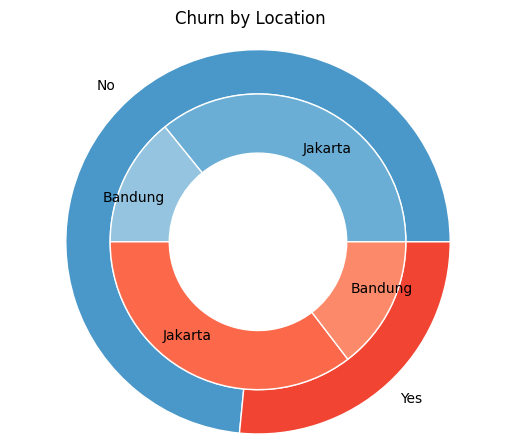

In [18]:
by_location = df_churn.groupby('Churn_Label')['Location'].value_counts(normalize=True).to_frame().rename(columns={'Location': 'Ratio'}).reset_index().sort_values('Churn_Label')

# Make data: I have 3 groups and 7 subgroups
group_names = df_churn['Churn_Label'].value_counts().index
group_size = df_churn['Churn_Label'].value_counts()
subgroup_names = by_location['Location']
subgroup_size = by_location['Ratio']

# Create colors
a, b = [plt.cm.Blues, plt.cm.Reds]

# First Ring (outside)
fig, ax = plt.subplots()
fig.suptitle('Churn by Location')
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6)])
plt.setp(mypie, width=0.3, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), b(0.5), b(0.4)])
plt.setp(mypie2, width=0.4, edgecolor='white')
plt.margins(0, 0)

# Show the plot
plt.show()


Mayoritas pelanggan yang tidak melakukan churn berlokasi di Jakarta, sedangkan mayoritas pelanggan yang melakukan churn juga berlokasi di Jakarta. Perbedaan rasio antara Jakarta dan Bandung dalam kategori 'No' dan 'Yes' mungkin mencerminkan perbedaan perilaku pelanggan di dua lokasi tersebut.

Rasio pelanggan yang melakukan churn di Jakarta lebih tinggi daripada di Bandung, menunjukkan bahwa kota Jakarta mungkin memiliki masalah churn yang lebih signifikan dibandingkan Bandung.

Data sementara ini memberikan informasi awal tentang hubungan antara lokasi dan churn, tetapi perlu dianalisis lebih lanjut untuk mendapatkan pemahaman yang lebih mendalam tentang faktor-faktor yang memengaruhi churn di masing-masing lokasi. Dapat dilakukan analisis statistik lebih lanjut untuk mengonfirmasi temuan ini dan memahami faktor-faktor yang mempengaruhi churn pelanggan.

In [19]:
df_churn.groupby('Churn_Label')['Location'].value_counts(normalize=True).to_frame().rename(columns={'Location': 'Ratio'}).reset_index().sort_values('Churn_Label')


,Churn_Label,Location,Ratio
0,No,Jakarta,0.716660
1,No,Bandung,0.283340
2,Yes,Jakarta,0.707865
3,Yes,Bandung,0.292135


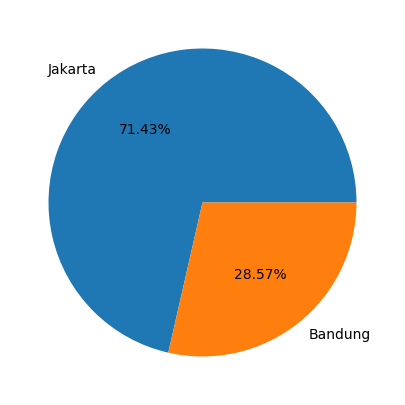

In [20]:
plt.figure(figsize=(10,5))
plt.pie(df_churn['Location'].value_counts(), labels=df_churn['Location'].unique(), autopct='%.2f%%')
plt.show()

In [21]:
df_churn['Location'].value_counts()

Jakarta    5031
Bandung    2012
Name: Location, dtype: int64

In [22]:
import seaborn as sns

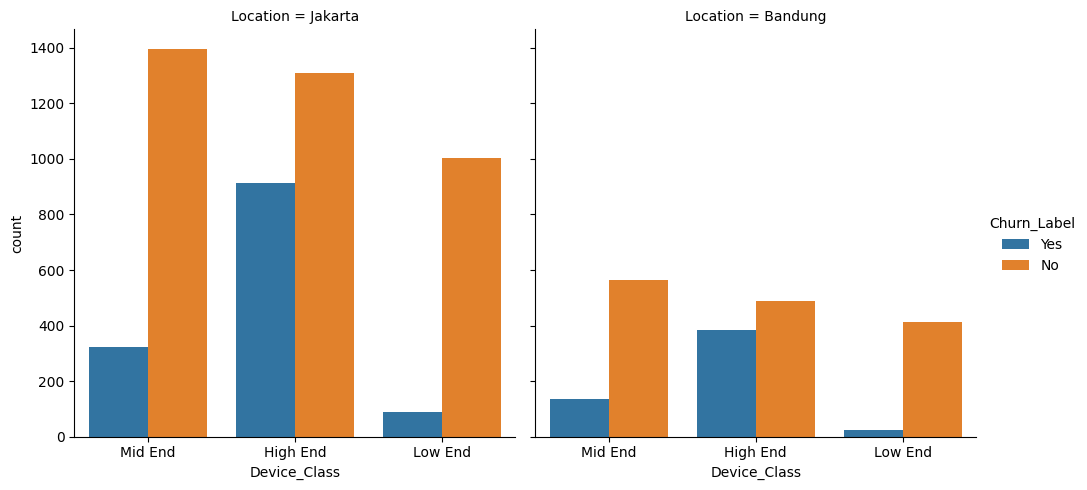

In [23]:
sns.catplot(x='Device_Class', hue='Churn_Label', col='Location', kind='count', data=df_churn)


In [24]:
by_device_location = df_churn.groupby(['Device_Class', 'Location'])['Churn_Label'].value_counts(normalize=True).to_frame().rename(columns={'Churn_Label': 'Ratio'}).reset_index().sort_values(['Device_Class', 'Location'])

by_device_location

,Device_Class,Location,Churn_Label,Ratio
0,High End,Bandung,No,0.560000
1,High End,Bandung,Yes,0.440000
2,High End,Jakarta,No,0.589374
3,High End,Jakarta,Yes,0.410626
4,Low End,Bandung,No,0.944828
5,Low End,Bandung,Yes,0.055172
6,Low End,Jakarta,No,0.918423
7,Low End,Jakarta,Yes,0.081577
8,Mid End,Bandung,No,0.804843
9,Mid End,Bandung,Yes,0.195157




-Dalam kategori 'High End', terdapat perbedaan rasio antara pelanggan di Bandung dan Jakarta. Pelanggan dengan perangkat kelas 'High End' di Bandung memiliki rasio lebih tinggi untuk melakukan churn (44%) dibandingkan dengan Jakarta (41%). Ini mungkin mengindikasikan bahwa kualitas atau layanan 'High End' di Bandung memiliki dampak negatif pada tingkat churn.

-Dalam kategori 'Low End', Bandung memiliki rasio pelanggan yang tidak melakukan churn yang lebih tinggi (94%) dibandingkan dengan Jakarta (91%). Ini menunjukkan bahwa pelanggan di Bandung dengan perangkat kelas 'Low End' cenderung tetap setia.

-Kategori 'Mid End' juga menunjukkan perbedaan rasio yang serupa dengan 'High End'. Pelanggan dengan perangkat kelas 'Mid End' di Bandung memiliki rasio lebih tinggi untuk melakukan churn (19%) dibandingkan dengan Jakarta (18%). Ini mungkin menunjukkan bahwa perangkat kelas 'Mid End' di Bandung memiliki pengaruh serupa.

Data ini memberikan gambaran awal bahwa jenis perangkat mungkin mempengaruhi tingkat churn, dan ada perbedaan dalam perilaku pelanggan di Bandung dan Jakarta. 

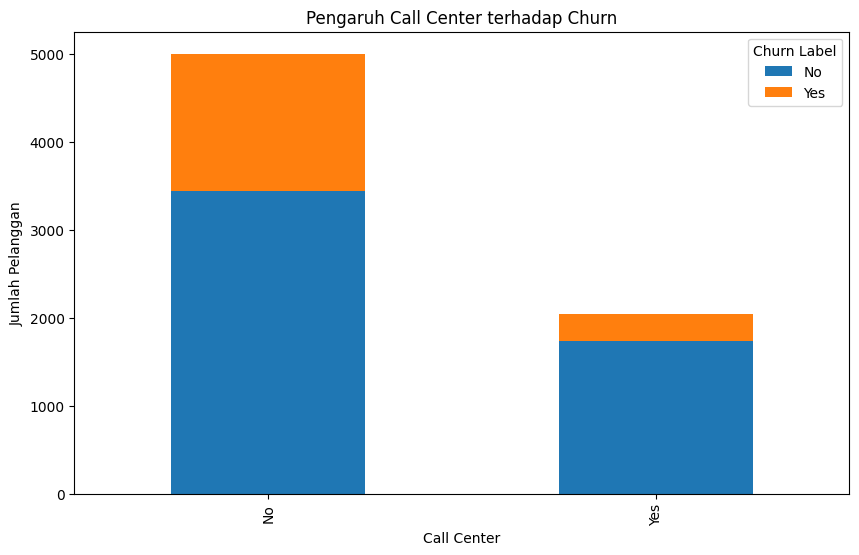

In [25]:
call_center_churn = df_churn.groupby(['Call_Center', 'Churn_Label']).size().unstack()

# Membuat bar plot
call_center_churn.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Pengaruh Call Center terhadap Churn")
plt.xlabel("Call Center")
plt.ylabel("Jumlah Pelanggan")
plt.legend(title="Churn Label")
plt.show()

In [26]:
call_center_churn = df_churn.groupby(['Call_Center', 'Churn_Label']).size().unstack()
call_center_churn['Churn_Ratio'] = call_center_churn['Yes'] / (call_center_churn['Yes'] + call_center_churn['No'])

# Menampilkan dataframe
print(call_center_churn)

Churn_Label    No   Yes  Churn_Ratio
Call_Center                         
No           3440  1559     0.311862
Yes          1734   310     0.151663



Berdasarkan hasil analisis sementara, terlihat bahwa ada pengaruh "Call Center" terhadap "Churn_Label." Dalam "Call Center" dengan label "No," rasio churn ("Yes") lebih tinggi daripada "Call Center" dengan label "Yes." Ini menunjukkan bahwa "Call Center" dengan label "No" memiliki rasio churn yang lebih tinggi.

In [27]:
import warnings

# Menonaktifkan semua peringatan
warnings.filterwarnings("ignore")

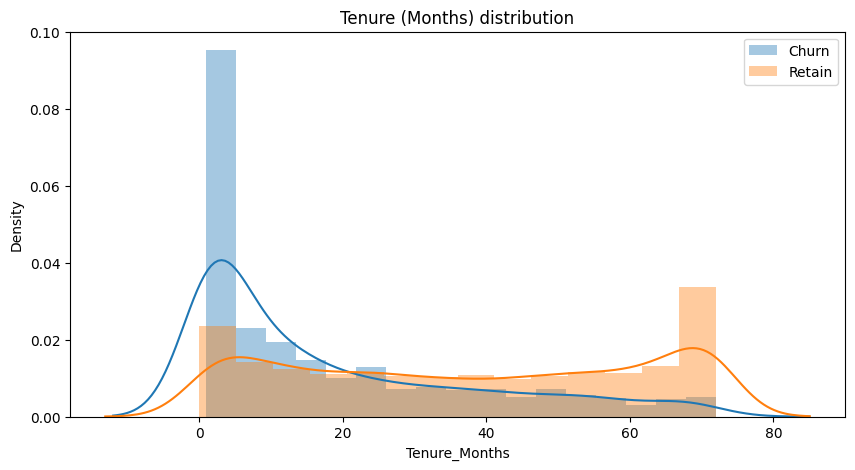

In [28]:
plt.figure(figsize=(10,5))
plt.title('Tenure (Months) distribution')
sns.distplot(df_churn[df_churn['Churn_Label'] == 'Yes']['Tenure_Months'], label='Churn')
sns.distplot(df_churn[df_churn['Churn_Label'] == 'No']['Tenure_Months'], label='Retain')
plt.legend(loc= 'upper right')
plt.show()

Semakin lama berlangganan Tingkat Churn semakin menurun

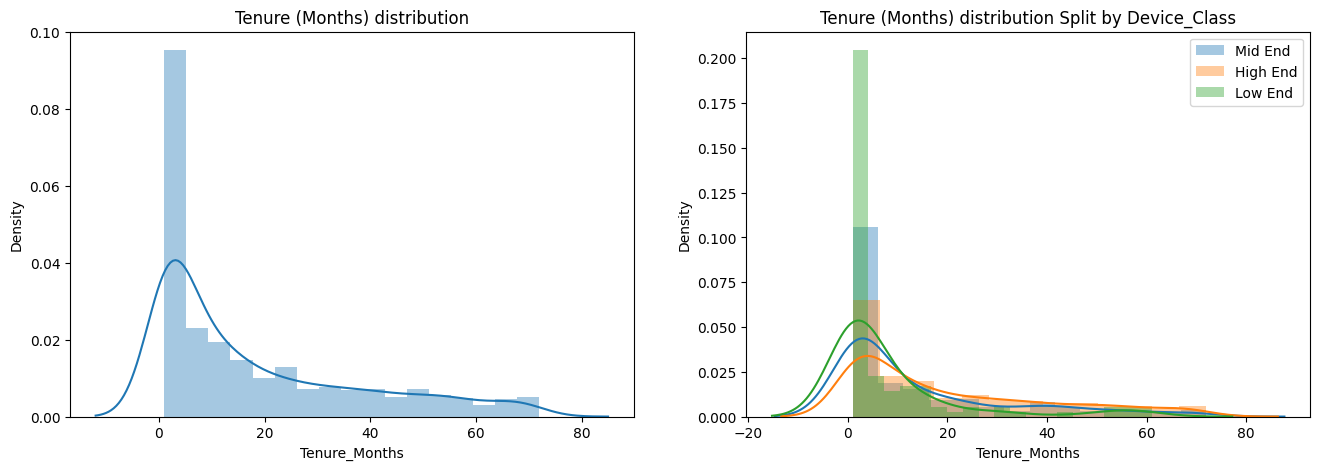

In [29]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.title('Tenure (Months) distribution')
sns.distplot(df_churn[df_churn['Churn_Label'] == 'Yes']['Tenure_Months'], label='Churn')

plt.subplot(1, 2, 2)
plt.title('Tenure (Months) distribution Split by Device_Class')
device_classes = df_churn['Device_Class'].unique()
for device_class in device_classes:
    sns.distplot(df_churn[(df_churn['Churn_Label'] == 'Yes') & (df_churn['Device_Class'] == device_class)]['Tenure_Months'], label=device_class)

plt.legend()
plt.show()


Di pengguna low end yang kurang dari 10 bulan, cenderung terjadi churn dibandingkan, mid end dan high end

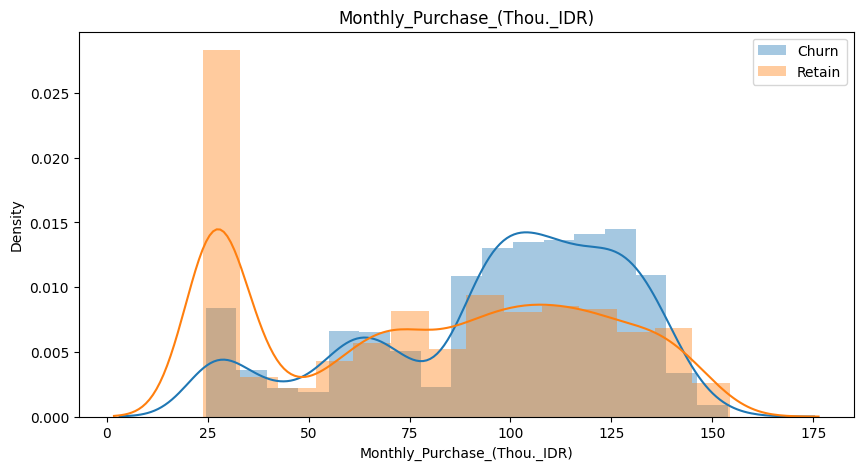

In [30]:
plt.figure(figsize=(10,5))
plt.title('Monthly_Purchase_(Thou._IDR)')
sns.distplot(df_churn[df_churn['Churn_Label'] == 'Yes']['Monthly_Purchase_(Thou._IDR)'], label='Churn')
sns.distplot(df_churn[df_churn['Churn_Label'] == 'No']['Monthly_Purchase_(Thou._IDR)'], label='Retain')
plt.legend(loc= 'upper right')
plt.show()

di sini dapat dilihat jelas, makin tinggi Belanja Bulanan, makin besar kemungkinan churn

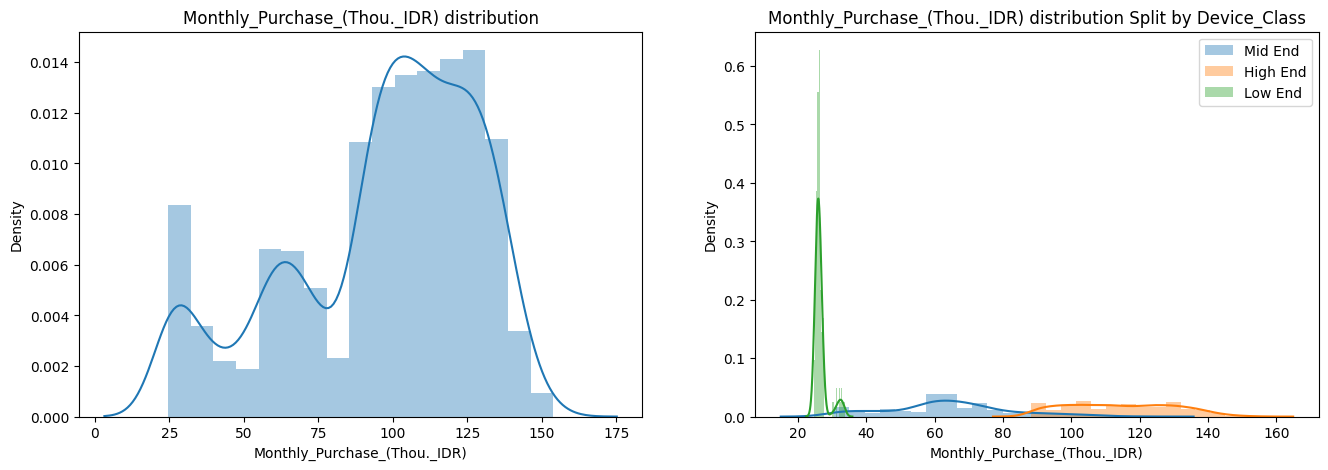

In [31]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.title('Monthly_Purchase_(Thou._IDR) distribution')
sns.distplot(df_churn[df_churn['Churn_Label'] == 'Yes']['Monthly_Purchase_(Thou._IDR)'], label='Churn')

plt.subplot(1, 2, 2)
plt.title('Monthly_Purchase_(Thou._IDR) distribution Split by Device_Class')
device_classes = df_churn['Device_Class'].unique()
for device_class in device_classes:
    sns.distplot(df_churn[(df_churn['Churn_Label'] == 'Yes') & (df_churn['Device_Class'] == device_class)]['Monthly_Purchase_(Thou._IDR)'], label=device_class)

plt.legend()
plt.show()


di sini kita liat, belanja bulanan device low end sangat rendah, nah belanja rendah cenderung memiliki retain yang tinggi, sedangkan pelanggan dengan device high end cenderung spend bulanannya tinggi, pelanggan dengan spend bulanan tinggi lebih berpeluang churn

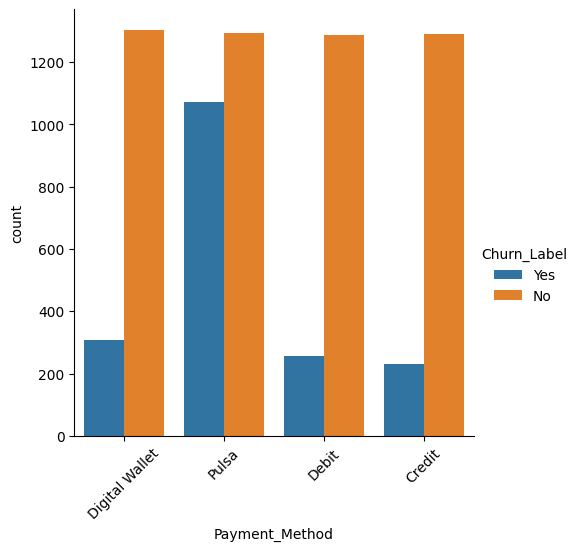

In [32]:
sns.catplot(x='Payment_Method', hue='Churn_Label', kind='count', data=df_churn)
plt.xticks(rotation=45)
plt.show()

In [33]:
pd.crosstab(df_churn['Payment_Method'], df_churn['Churn_Label'], normalize=0)

Churn_Label,No,Yes
Payment_Method,,
Credit,0.847569,0.152431
Debit,0.832902,0.167098
Digital Wallet,0.808933,0.191067
Pulsa,0.547146,0.452854


-Pelanggan yang menggunakan metode pembayaran "Pulsa" memiliki tingkat churn yang lebih tinggi (45.28%) dibandingkan dengan metode pembayaran lainnya. Ini menunjukkan bahwa metode pembayaran "Pulsa" mungkin memiliki faktor-faktor yang mempengaruhi pelanggan untuk berpindah.

-Metode pembayaran "Credit" memiliki tingkat churn yang lebih rendah (15.24%) dibandingkan dengan metode pembayaran lainnya. Pelanggan yang menggunakan metode pembayaran "Credit" cenderung lebih stabil dan cenderung untuk tetap sebagai pelanggan.

-Pelanggan yang menggunakan metode pembayaran "Debit" dan "Digital Wallet" memiliki tingkat churn yang berada di tengah-tengah, yaitu sekitar 16.71% dan 19.11%. Ini menunjukkan bahwa kedua metode pembayaran ini memiliki pengaruh yang lebih rendah terhadap keputusan pelanggan untuk beralih.



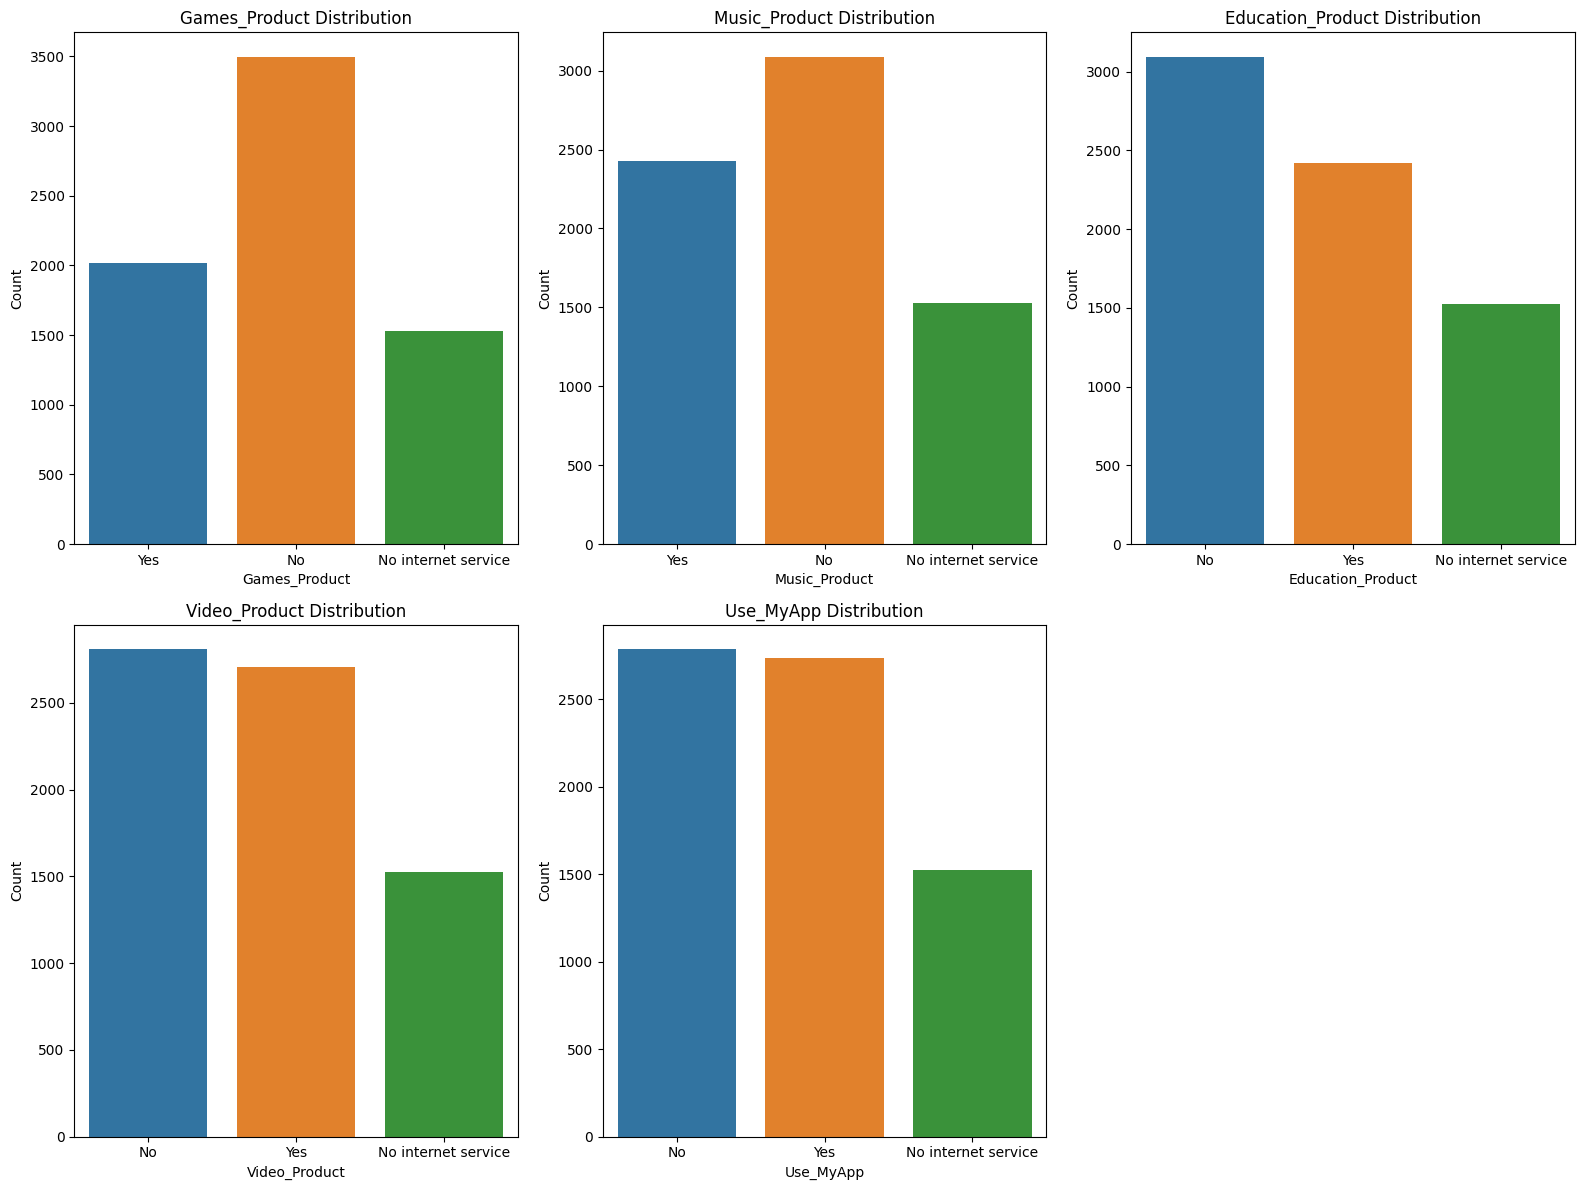

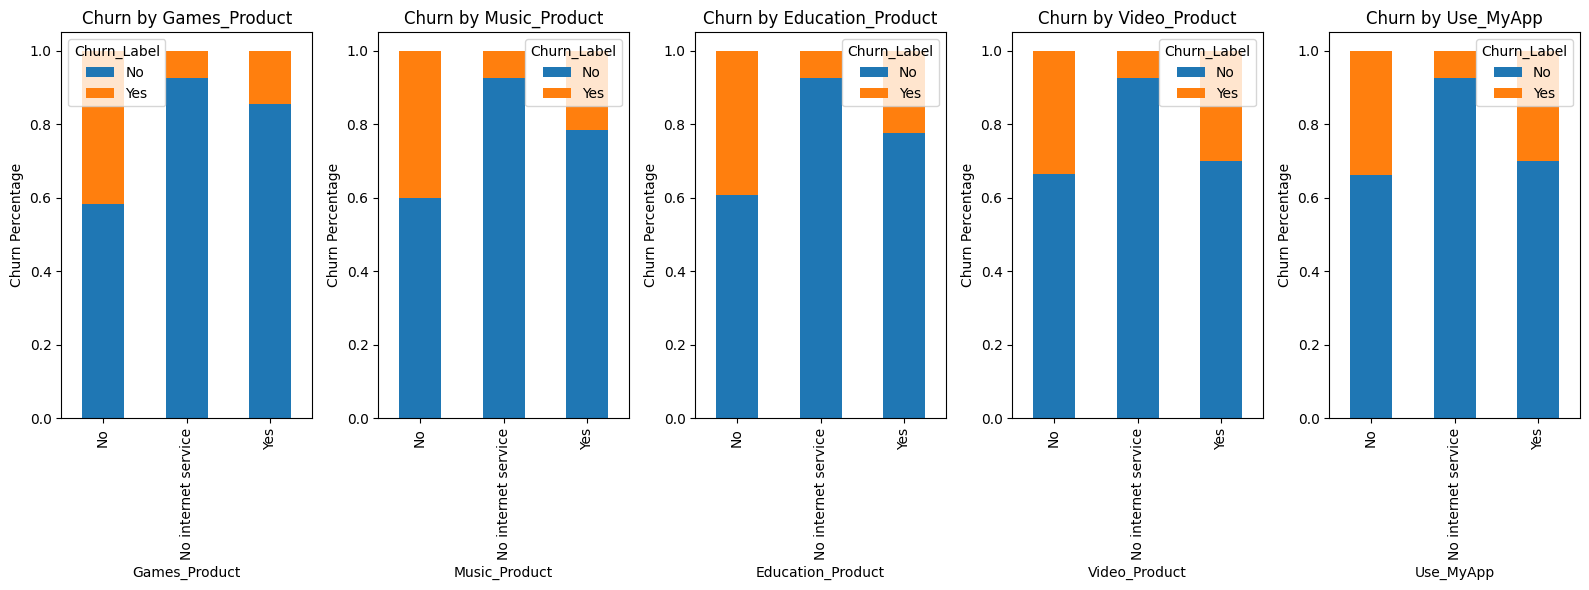

Games_Product        Music_Product        Education_Product    Video_Product        Use_MyApp          
No                   No                   No                   No                   No                      75.374981
                                                                                    Yes                     96.051168
                                                               Yes                  No                      95.979431
                                                                                    Yes                    113.068737
                                          Yes                  No                   No                      83.048575
                                                                                    Yes                    100.499653
                                                               Yes                  No                     101.897656
                                                                      

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# List atribut kategori yang akan dianalisis
product_attributes = ['Games_Product', 'Music_Product', 'Education_Product', 'Video_Product', 'Use_MyApp']

# Analisis distribusi
plt.figure(figsize=(16, 12))
for i, attribute in enumerate(product_attributes, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df_churn, x=attribute)
    plt.title(f'{attribute} Distribution')
    plt.xlabel(attribute)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Analisis pengaruh terhadap Churn
plt.figure(figsize=(16, 6))
for i, attribute in enumerate(product_attributes, 1):
    plt.subplot(1, 5, i)
    churn_by_attribute = df_churn.groupby(attribute)['Churn_Label'].value_counts(normalize=True).unstack()
    churn_by_attribute.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Churn by {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Churn Percentage')

plt.tight_layout()
plt.show()

# Analisis korelasi dengan Monthly_Purchase_(Thou._IDR)
correlations = df_churn.groupby(product_attributes)['Monthly_Purchase_(Thou._IDR)'].mean()
print(correlations)


-Pelanggan yang tidak menggunakan layanan Games_Product, Music_Product, Education_Product, Video_Product, dan Use_MyApp ("No" pada semua kolom) memiliki Monthly Purchase (Thou. IDR) terendah, yang berkisar antara 75.37 hingga 96.05.

-Pelanggan yang menggunakan layanan "Use_MyApp" ("Yes" pada kolom Use_MyApp) memiliki Monthly Purchase (Thou. IDR) lebih tinggi dibandingkan dengan yang tidak menggunakan "Use_MyApp." Monthly Purchase (Thou. IDR) untuk pelanggan yang menggunakan "Use_MyApp" berkisar antara 96.05 hingga 128.68.

-Untuk kombinasi layanan tertentu, seperti Games_Product, Music_Product, dan Video_Product yang diaktifkan ("Yes"), Monthly Purchase (Thou. IDR) cenderung lebih tinggi daripada kombinasi di mana layanan tersebut tidak diaktifkan ("No").

-Terdapat pula beberapa kombinasi yang diberi label "No internet service." Dalam kombinasi ini, Monthly Purchase (Thou. IDR) cenderung lebih rendah dibandingkan dengan kombinasi yang melibatkan layanan tertentu.

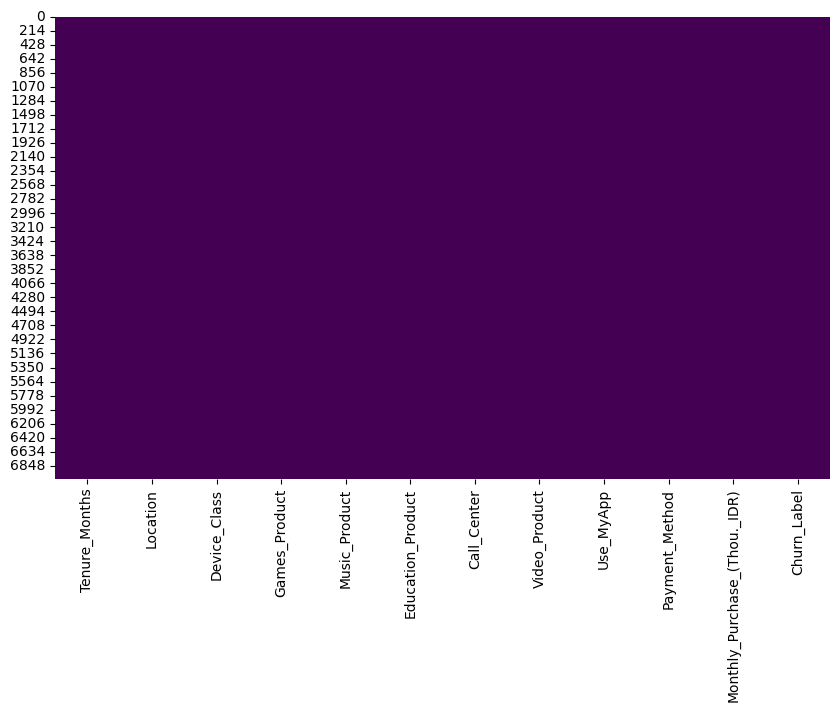

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df_churn.isna(), cbar=False, cmap='viridis')
plt.show()

Unggu melambangkan tidak ada data kosong

# **Ringkasan EDA:**

## Churn_Label (Churn vs. Retain)
Dalam data pelanggan Anda, terdapat 73.46% pelanggan yang beralih (Churn) dan 26.54% pelanggan yang tidak beralih (Tidak Churn).

## Rasio Churn Berdasarkan Device_Class
- Rasio Churn berdasarkan kelas perangkat adalah sebagai berikut:
  - High End: 44%
  - Mid End: 19%
  - Low End: 5%
- Ini menunjukkan bahwa pelanggan dengan perangkat "High End" lebih mungkin untuk beralih daripada yang lain.

## Rasio Churn Berdasarkan Lokasi (Location)
- Rasio Churn berdasarkan lokasi adalah sebagai berikut:
  - Jakarta: 31%
  - Bandung: 29%
- Pelanggan di Jakarta cenderung memiliki tingkat Churn yang lebih tinggi dibandingkan Bandung.

## Rasio Churn Berdasarkan Metode Pembayaran (Payment_Method)
- Rasio Churn berdasarkan metode pembayaran adalah sebagai berikut:
  - Pulsa: 45%
  - Credit: 15%
  - Debit: 16.71%
  - Digital Wallet: 19.11%
- Pelanggan yang menggunakan metode pembayaran "Pulsa" cenderung memiliki tingkat Churn yang lebih tinggi.

## Rasio Churn Berdasarkan Layanan (Games_Product, Music_Product, Education_Product, Video_Product, Use_MyApp)
- Pelanggan yang menggunakan layanan tertentu ("Yes" pada kolom) cenderung memiliki Monthly Purchase (Thou. IDR) yang lebih tinggi daripada yang tidak menggunakan layanan tersebut.

# **Kesimpulan dan Insight:**

1. **Device_Class**: 
   - Pelanggan dengan perangkat "High End" memiliki tingkat Churn yang tinggi. Perlu memperhatikan faktor-faktor yang memengaruhi perangkat ini agar dapat meminimalkan Churn.

2. **Lokasi (Location)**: 
   - Lokasi Jakarta memiliki tingkat Churn yang lebih tinggi dibandingkan dengan Bandung. Ini mungkin karena perbedaan perilaku pelanggan di dua lokasi. Perlu dilakukan analisis lebih lanjut untuk memahami faktor-faktor di baliknya.

3. **Metode Pembayaran (Payment_Method)**: 
   - Pelanggan dengan metode pembayaran "Pulsa" memiliki tingkat Churn yang tinggi. Perlu diteliti faktor-faktor yang memengaruhi pelanggan untuk berpindah dari metode pembayaran ini.

4. **Layanan (Games_Product, Music_Product, Education_Product, Video_Product, Use_MyApp)**: 
   - Pelanggan yang menggunakan layanan tertentu cenderung memiliki Monthly Purchase yang lebih tinggi. Perlu promosi lebih lanjut untuk mendorong pelanggan untuk mengaktifkan layanan-layanan tersebut.

# **Strategi Bisnis yang Menguntungkan:**

1. Fokus pada Pengguna "High End":
   - Mengidentifikasi dan memahami penyebab tingginya tingkat Churn di antara pengguna "High End." Upaya dapat difokuskan pada meningkatkan retensi pelanggan dalam kategori ini.

2. Analisis Lebih Lanjut Berdasarkan Lokasi:
   - Melakukan analisis lebih mendalam tentang perbedaan perilaku pelanggan di Jakarta dan Bandung. Ini akan membantu dalam merancang strategi yang sesuai untuk masing-masing lokasi.

3. Evaluasi Metode Pembayaran:
   - Mengevaluasi metode pembayaran "Pulsa" untuk memahami mengapa tingkat Churn tinggi. Kemungkinan strategi promosi atau penggantian metode pembayaran mungkin diperlukan.

4. Promosi Layanan Tambahan:
   - Mendorong pelanggan untuk mengaktifkan layanan seperti Games_Product, Music_Product, Education_Product, dan lainnya yang dapat meningkatkan Monthly Purchase.

5. Segmentasi Pelanggan:
   - Melakukan segmentasi pelanggan berdasarkan karakteristik mereka, seperti Device_Class dan lokasi, untuk merancang strategi yang lebih personal dan efektif.

Analisis EDA ini adalah langkah awal yang penting dalam memahami perilaku pelanggan dan mengembangkan strategi retensi yang lebih efektif. Dengan pemahaman yang lebih mendalam, perusahaan dapat mengambil tindakan yang sesuai untuk mengurangi tingkat Churn dan meningkatkan retensi pelanggan.


Modeling

Menampilkan 5 data pertama

In [36]:
df_churn.head()

,Tenure_Months,Location,Device_Class,Games_Product,Music_Product,Education_Product,Call_Center,Video_Product,Use_MyApp,Payment_Method,Monthly_Purchase_(Thou._IDR),Churn_Label
0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes
1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes
2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes
3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes
4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes


Menampilakn report data

In [37]:
report(df_churn)

,Column,d_type,unique_sample,n_uniques
0,Tenure_Months,int64,"[2, 8, 28, 49, 10]",73
1,Location,object,"[Jakarta, Bandung]",2
2,Device_Class,object,"[Mid End, High End, Low End]",3
3,Games_Product,object,"[Yes, No, No internet service]",3
4,Music_Product,object,"[Yes, No, No internet service]",3
5,Education_Product,object,"[No, Yes, No internet service]",3
6,Call_Center,object,"[No, Yes]",2
7,Video_Product,object,"[No, Yes, No internet service]",3
8,Use_MyApp,object,"[No, Yes, No internet service]",3
9,Payment_Method,object,"[Digital Wallet, Pulsa, Debit, Credit]",4


Melakukan mapping untuk membuat tipe data nominal menjadi numerik, agar dapat dilakukan pemodelan

In [38]:
# Membuat mapping untuk setiap atribut
mapping1 = {'Jakarta': 1, 'Bandung': 2}
mapping2 = {'Mid End': 1, 'High End': 2, 'Low End': 3}
mapping3 = {'Yes': 1, 'No': 2, 'No internet service': 3}
mapping4 = {'No': 1, 'Yes': 2}
mapping5 = {'Digital Wallet': 1, 'Pulsa': 2, 'Debit': 3, 'Credit': 4}
mapping6 = {'Yes': 1, 'No': 0}

# Melakukan label encoding pada atribut-atribut
df_churn['Location'] = df_churn['Location'].map(mapping1)
df_churn['Device_Class'] = df_churn['Device_Class'].map(mapping2)
df_churn['Games_Product'] = df_churn['Games_Product'].map(mapping3)
df_churn['Music_Product'] = df_churn['Music_Product'].map(mapping3)
df_churn['Education_Product'] = df_churn['Education_Product'].map(mapping3)
df_churn['Call_Center'] = df_churn['Call_Center'].map(mapping4)
df_churn['Video_Product'] = df_churn['Video_Product'].map(mapping3)
df_churn['Use_MyApp'] = df_churn['Use_MyApp'].map(mapping3)
df_churn['Payment_Method'] = df_churn['Payment_Method'].map(mapping5)
df_churn['Churn_Label'] = df_churn['Churn_Label'].map(mapping6)

# Menampilkan DataFrame yang sudah di-label encoding
print(df_churn)


      Tenure_Months  Location  Device_Class  Games_Product  Music_Product  \
0                 2         1             1              1              1   
1                 2         1             2              2              2   
2                 8         1             2              2              2   
3                28         1             2              2              2   
4                49         1             2              2              1   
...             ...       ...           ...            ...            ...   
7038             72         1             3              3              3   
7039             24         1             1              1              2   
7040             72         1             2              2              1   
7041             11         1             1              1              2   
7042             66         1             2              1              2   

      Education_Product  Call_Center  Video_Product  Use_MyApp  \
0        

In [39]:
df_churn.head()

,Tenure_Months,Location,Device_Class,Games_Product,Music_Product,Education_Product,Call_Center,Video_Product,Use_MyApp,Payment_Method,Monthly_Purchase_(Thou._IDR),Churn_Label
0,2,1,1,1,1,2,1,2,2,1,70.005,1
1,2,1,2,2,2,2,1,2,2,2,91.910,1
2,8,1,2,2,2,1,1,1,1,2,129.545,1
3,28,1,2,2,2,1,2,1,1,2,136.240,1
4,49,1,2,2,1,1,1,1,1,3,134.810,1


In [40]:
df_churn["Churn_Label"].value_counts()

0    5174
1    1869
Name: Churn_Label, dtype: int64

Melakukan oversampling dengan SMOTE agar mendapat data yang seimbang

In [41]:
from imblearn.over_sampling import SMOTE

# Misalkan Anda telah membagi dataset Anda menjadi X dan y, atau jika belum, Anda bisa melakukannya seperti ini:
X = df_churn.drop('Churn_Label', axis=1)  # Atribut
y = df_churn['Churn_Label']  # Label

# Inisialisasi SMOTE
smote = SMOTE(sampling_strategy='auto')

# Terapkan SMOTE pada data Anda
X_resampled, y_resampled = smote.fit_resample(X, y)

In [42]:
y_resampled.value_counts()


1    5174
0    5174
Name: Churn_Label, dtype: int64

In [43]:
df_churn_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_churn_resampled['Churn_Label'] = y_resampled

In [44]:
df_churn_resampled['Churn_Label'].value_counts()

1    5174
0    5174
Name: Churn_Label, dtype: int64

In [45]:
df_churn_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10348 entries, 0 to 10347
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Tenure_Months                 10348 non-null  int64  
 1   Location                      10348 non-null  int64  
 2   Device_Class                  10348 non-null  int64  
 3   Games_Product                 10348 non-null  int64  
 4   Music_Product                 10348 non-null  int64  
 5   Education_Product             10348 non-null  int64  
 6   Call_Center                   10348 non-null  int64  
 7   Video_Product                 10348 non-null  int64  
 8   Use_MyApp                     10348 non-null  int64  
 9   Payment_Method                10348 non-null  int64  
 10  Monthly_Purchase_(Thou._IDR)  10348 non-null  float64
 11  Churn_Label                   10348 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 970.3 KB


In [46]:
x =df_churn_resampled.drop (columns="Churn_Label", axis=1)

y = df_churn_resampled["Churn_Label"]

In [47]:
print(x)

       Tenure_Months  Location  Device_Class  Games_Product  Music_Product  \
0                  2         1             1              1              1   
1                  2         1             2              2              2   
2                  8         1             2              2              2   
3                 28         1             2              2              2   
4                 49         1             2              2              1   
...              ...       ...           ...            ...            ...   
10343             54         1             1              1              1   
10344              7         1             1              1              2   
10345              4         1             1              2              2   
10346             56         1             2              1              1   
10347             38         1             1              1              1   

       Education_Product  Call_Center  Video_Product  Use_MyApp

In [48]:
print(y)

0        1
1        1
2        1
3        1
4        1
        ..
10343    1
10344    1
10345    1
10346    1
10347    1
Name: Churn_Label, Length: 10348, dtype: int64


import library yang dibutuhkan

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


melakukan standarisasi data menggunakan standar scaler, dan menyimpan modelnya

In [50]:
import pickle

# Membuat objek StandardScaler dan melakukan fitting terlebih dahulu
scaler = StandardScaler()
scaler.fit(x)  # Gantilah 'training_data' dengan data pelatihan yang sesuai

# Menyimpan objek StandardScaler ke dalam file 'scaler.sav'
with open('scaler.sav', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)


In [51]:
standarized_data = scaler.transform(x)

In [52]:
print(standarized_data)

[[-1.06255936 -0.55174682 -1.24393657 ...  0.36774633 -1.30528012
  -0.483112  ]
 [-1.06255936 -0.55174682  0.22852461 ...  0.36774633 -0.28618863
   0.10186589]
 [-0.81332368 -0.55174682  0.22852461 ... -1.01153567 -0.28618863
   1.10691692]
 ...
 [-0.9794808  -0.55174682 -1.24393657 ...  0.36774633 -1.30528012
  -0.59180663]
 [ 1.18056175 -0.55174682  0.22852461 ... -1.01153567  0.73290287
   1.27573504]
 [ 0.43285471 -0.55174682 -1.24393657 ...  0.36774633 -0.28618863
  -1.00737588]]


In [53]:
x = standarized_data
y = df_churn_resampled["Churn_Label"]

In [54]:
print(x)
print(y)

[[-1.06255936 -0.55174682 -1.24393657 ...  0.36774633 -1.30528012
  -0.483112  ]
 [-1.06255936 -0.55174682  0.22852461 ...  0.36774633 -0.28618863
   0.10186589]
 [-0.81332368 -0.55174682  0.22852461 ... -1.01153567 -0.28618863
   1.10691692]
 ...
 [-0.9794808  -0.55174682 -1.24393657 ...  0.36774633 -1.30528012
  -0.59180663]
 [ 1.18056175 -0.55174682  0.22852461 ... -1.01153567  0.73290287
   1.27573504]
 [ 0.43285471 -0.55174682 -1.24393657 ...  0.36774633 -0.28618863
  -1.00737588]]
0        1
1        1
2        1
3        1
4        1
        ..
10343    1
10344    1
10345    1
10346    1
10347    1
Name: Churn_Label, Length: 10348, dtype: int64


membagagi data train dan data test

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


melakukan optimasi hyperparameter(mencari parameter terbaik menggunakan gridSearch)

In [56]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')
random_search.fit(x, y)

best_params = random_search.best_params_
best_accuracy = random_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)


Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
Best Accuracy: 0.8159145705059505


Melatih model random forest

In [57]:
best_model = RandomForestClassifier(n_estimators=best_params['n_estimators'], 
                                    max_depth=best_params['max_depth'],
                                    min_samples_split=best_params['min_samples_split'],
                                    min_samples_leaf=best_params['min_samples_leaf'])
best_model.fit(x_train, y_train)  # Latih model dengan data pelatihan


RandomForestClassifier(min_samples_split=5, n_estimators=200)

Evaluasi Hasil Random Forest

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = best_model.predict(x_test)  # Melakukan prediksi pada data pengujian
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Akurasi:", accuracy)
print("Presisi:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Akurasi: 0.8183574879227054
Presisi: 0.8077969174977334
Recall: 0.8445497630331753
F1-score: 0.8257645968489342


In [59]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

Memvisualisasikan Confusion Matrix dari model random forest

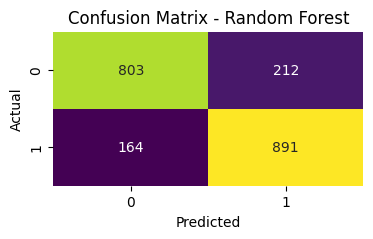

In [60]:
plot_confusion_matrix(y_test, y_pred, 'Confusion Matrix - Random Forest')

In [62]:
import numpy as np

Melakukan Testting Prediction

In [63]:
input_data = (11,1	,1	,1,	2,	2,	1,	2,	2,	2,	38.480	)
input_dataArray =np.array(input_data)
data_reshape =input_dataArray.reshape(1,-1)
std_data =scaler.transform(data_reshape)

print(std_data)

prediction = best_model.predict(std_data)
print(prediction)

if (prediction[0] == 0 ):
    print("tidak Churn")

else :
    print("churn")

[[-0.68870584 -0.55174682 -1.24393657 -1.36960708  0.28209242  0.28536662
  -0.52156919  0.36563065  0.36774633 -0.28618863 -1.32499413]]
[0]
tidak Churn


Menyimpan Model Random Forest(churn)

In [64]:
import pickle
filename = "churn.sav"
pickle.dump(best_model, open(filename,"wb"))